In [39]:
import numpy as np
import pandas as pd
from sklearn import linear_model as lm

In [40]:
#df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv")
#df.to_csv("homeprices.csv", index=False)
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [41]:
#one hot encoding using pandas get dummies
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [42]:
merged = pd.concat([df,dummies], axis = "columns")
del merged["town"]
del merged["monroe township"]
merged

,area,price,robinsville,west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [43]:
x = merged.drop("price", axis="columns")
y = merged["price"]

In [44]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
model.predict([[2800,1,0]])

array([590775.63964739])

In [46]:
model.predict([[2900,0,1]])

array([617792.94775317])

In [47]:
model.score(x,y)

0.9573929037221871

In [48]:
# label encoding using sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2 = df


In [49]:
df2["town"]= le.fit_transform(df2.town)
df2


,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [50]:
X = df2.drop("price", axis="columns")
Y = df2["price"]

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
model2 = lm.LinearRegression()
model2.fit(df[["area"]],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

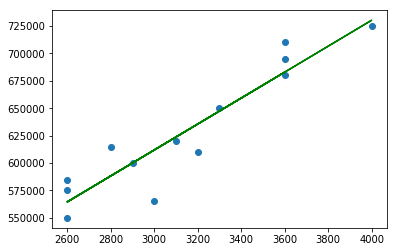

In [53]:
plt.scatter(df[["area"]],df.price, marker="o")
plt.plot(df["area"],model2.predict(df[["area"]]), color = "green")